## 1. **EDA**

**Library yang digunakan**

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


pd.set_option('display.max_columns', None)  # Agar semua kolom ditampilkan
import matplotlib.ticker as ticker  # Untuk atur jumlah tick


Penjelasan:

Mengimpor pustaka penting untuk data analysis (pandas, numpy), visualisasi (seaborn, matplotlib), preprocessing (LabelEncoder, StandardScaler), dan penanganan data imbalance (SMOTE).

Menyeting pandas agar menampilkan semua kolom pada DataFrame.

ticker dari matplotlib digunakan untuk mengatur jumlah dan interval pada sumbu grafik.

Kesimpulan:

Library yang dibutuhkan untuk analisis data, preprocessing, visualisasi, dan penyeimbangan kelas telah dipersiapkan.

**Memuat dan Menampilkan Informasi Awal Dataset**

In [33]:
#Membaca Dataset
df= pd.read_csv('ObesityDataSet.csv')

Penjelasan:

Membaca file CSV yang bernama ObesityDataSet.csv ke dalam variabel df sebagai DataFrame.

Kesimpulan:

Dataset berhasil dimuat ke dalam variabel df dan siap untuk dianalisis lebih lanjut.



In [34]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Penjelasan:

Kode ini digunakan untuk menghubungkan Google Drive ke Google Colab, agar file dari Drive bisa diakses dalam notebook.

Kesimpulan:

Google Drive berhasil di-mount ke path /content/drive, memungkinkan akses file dari Drive.



In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ObesityDataSet.csv')

In [35]:
# Melihat Struktur Dataset
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


Penjelasan:
Menampilkan 5 baris pertama dari dataset untuk melihat struktur awal data dan kolom yang tersedia.

Kesimpulan:
Struktur dataset terlihat; kita bisa mengamati nama kolom dan tipe datanya secara langsung.



In [36]:
# Informasi umum
print(df.info()) #info() memberikan tipe data, jumlah null.

# Statistik deskriptif untuk kolom numerik
print(df.describe()) # Memberikan ringkasan statistik (mean, std, min, max, dll) untuk kolom numerik.
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

Penjelasan:
Memberikan informasi tentang jumlah kolom, tipe data setiap kolom, dan jumlah nilai non-null.

Kesimpulan:
Diperoleh informasi bahwa sebagian besar data bertipe object dan float, serta tidak ada nilai null.

In [37]:
# Cek Nilai Unik di Target
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

Penjelasan:
Menampilkan kategori unik dari target klasifikasi NObeyesdad (kategori obesitas).

Kesimpulan:
Terdapat beberapa kategori obesitas (seperti Normal_Weight, Obesity_Type_I, dll), menandakan ini adalah klasifikasi multi-kelas.

**Visualisasi Data**

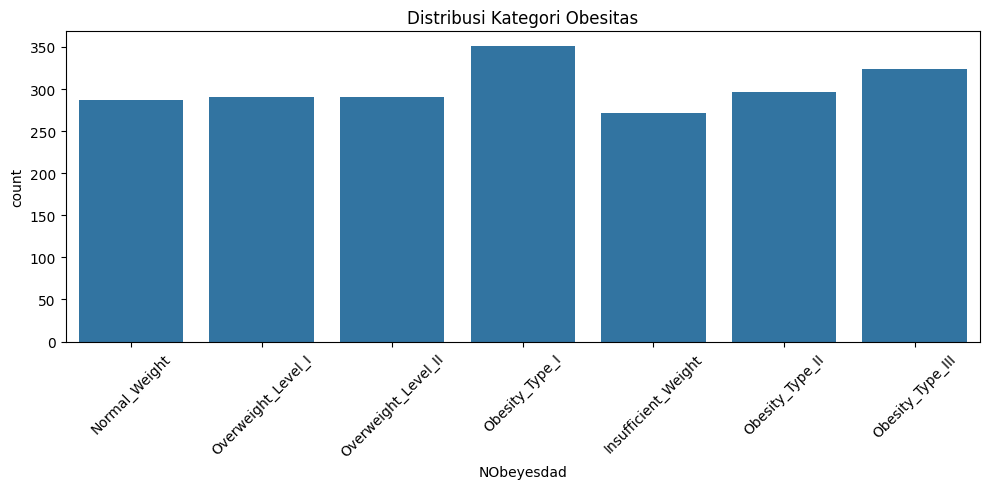

In [38]:
# Distribusi target (Obesity Level)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='NObeyesdad')
plt.title("Distribusi Kategori Obesitas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Penjelasan:
Membuat bar chart untuk menunjukkan jumlah sampel pada masing-masing kelas target.

Kesimpulan:
Terlihat bahwa data tidak seimbang (imbalanced class problem), beberapa kelas memiliki data jauh lebih banyak dari yang lain.

**Cek Missing Values, Nilai Unik, Duplikat, Keseimbangan Data, dan Outlier**

In [9]:
# Cek jumlah missing values di setiap kolom
missing_values = df.isnull().sum()
print("Jumlah Missing Values per Kolom:\n", missing_values)

Jumlah Missing Values per Kolom:
 Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [10]:
# Cek jumlah unique values di setiap kolom
unique_values = df.nunique()
print("\nJumlah Unique Values per Kolom:\n", unique_values)

# Untuk melihat unique values pada kolom tertentu (misalnya, 'Gender'):
print("\nUnique Values pada Kolom Gender:", df['Gender'].unique())


Jumlah Unique Values per Kolom:
 Age                               1393
Gender                               3
Height                            1561
Weight                            1517
CALC                                 5
FAVC                                 3
FCVC                               807
NCP                                636
SCC                                  3
SMOKE                                3
CH2O                              1262
family_history_with_overweight       3
FAF                               1185
TUE                               1129
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64

Unique Values pada Kolom Gender: ['Female' 'Male' '?' nan]


In [11]:
# Cek jumlah data duplikat
duplicate_count = df.duplicated().sum()
print("\nJumlah Data Duplikat:", duplicate_count)

# Untuk melihat baris-baris yang duplikat:
# df_duplicates = df[df.duplicated(keep=False)] # keep=False menandai semua duplikat
# print("\nBaris Data Duplikat:\n", df_duplicates)


Jumlah Data Duplikat: 18



Distribusi Keseimbangan Data (Kolom NObeyesdad):
 NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


<ipython-input-12-844834c59a00>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', palette='viridis')


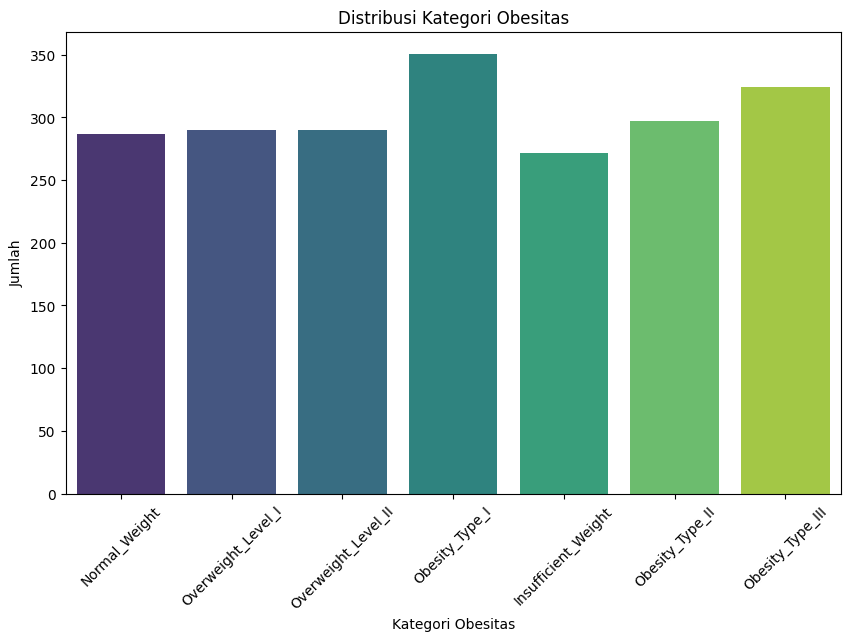

In [12]:
# Cek keseimbangan data pada kolom target 'NObeyesdad'
class_distribution = df['NObeyesdad'].value_counts()
print("\nDistribusi Keseimbangan Data (Kolom NObeyesdad):\n", class_distribution)


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', palette='viridis')
plt.title('Distribusi Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # memiringkan label sumbu X sebesar 45 derajat
plt.show()



<ipython-input-13-635315f10144>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pair', y='Correlation', data=correlation_data, palette='viridis')


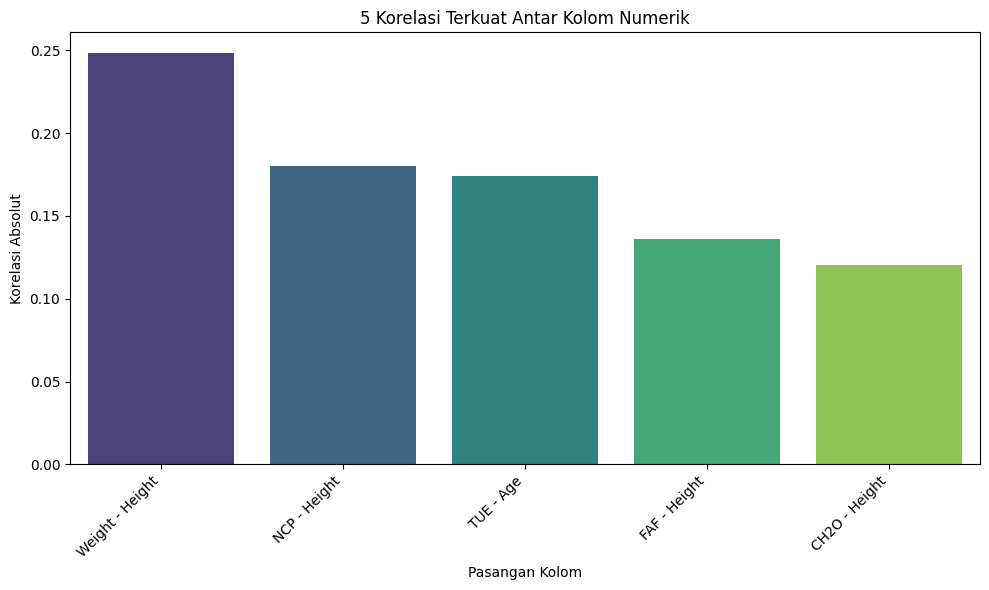

In [13]:
# Konversi kolom-kolom numerik ke tipe data numerik
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hapus baris dengan missing values pada kolom numerik
df_cleaned = df.dropna(subset=numerical_columns)

# Hitung matriks korelasi
correlation_matrix = df_cleaned[numerical_columns].corr()

# Ambil nilai korelasi absolut dan urutkan
abs_corr_matrix = np.abs(correlation_matrix)
upper_triangle = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(bool))
strong_correlations = upper_triangle.unstack().sort_values(ascending=False)
strong_correlations = strong_correlations.dropna()  # Hapus NaN

# Pilih 5 korelasi teratas
top_5_correlations = strong_correlations.head(5)

# Siapkan data untuk diagram batang
correlation_data = pd.DataFrame({
    'Pair': [f"{pair[0]} - {pair[1]}" for pair in top_5_correlations.index],
    'Correlation': top_5_correlations.values
})

# Visualisasikan dalam diagram batang
plt.figure(figsize=(10, 6))
sns.barplot(x='Pair', y='Correlation', data=correlation_data, palette='viridis')
plt.title('5 Korelasi Terkuat Antar Kolom Numerik')
plt.xlabel('Pasangan Kolom')
plt.ylabel('Korelasi Absolut')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar terbaca
plt.tight_layout()  # Untuk mencegah label tumpang tindih
plt.show()

<ipython-input-16-bcd5a24d3843>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=col, data=df_cleaned, palette='Set2')


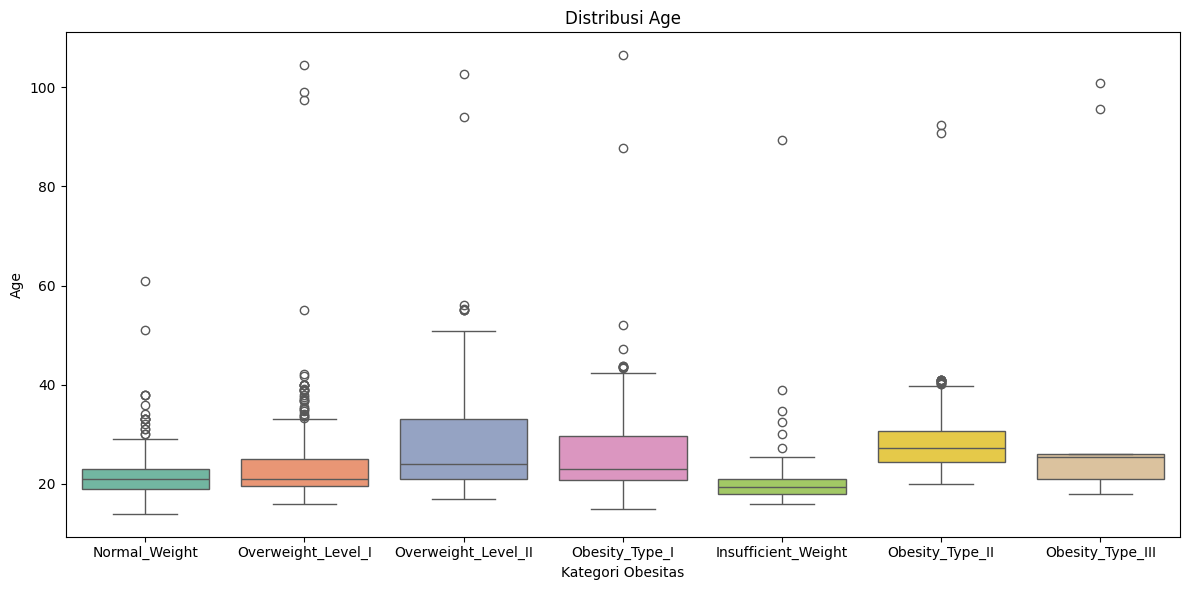

<ipython-input-16-bcd5a24d3843>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=col, data=df_cleaned, palette='Set2')


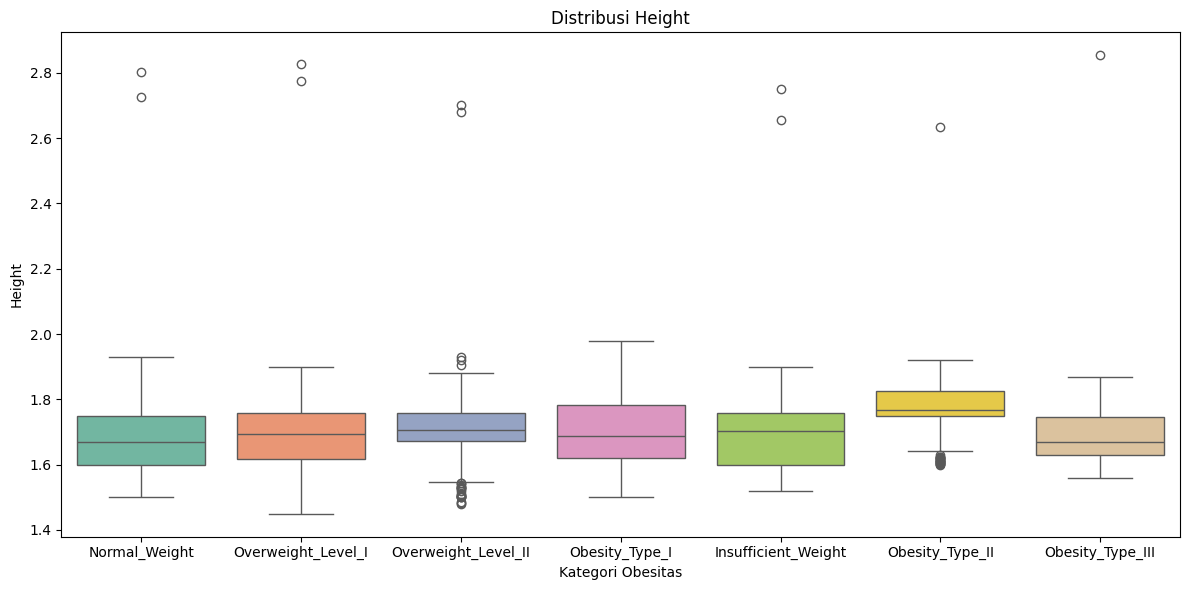

<ipython-input-16-bcd5a24d3843>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=col, data=df_cleaned, palette='Set2')


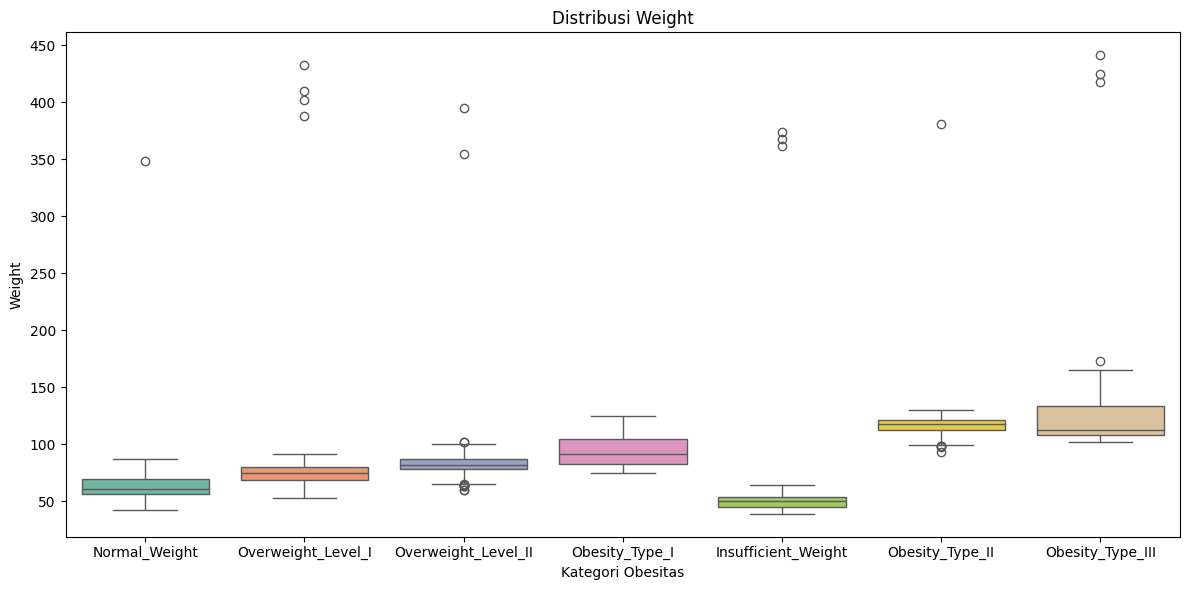

<ipython-input-16-bcd5a24d3843>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=col, data=df_cleaned, palette='Set2')


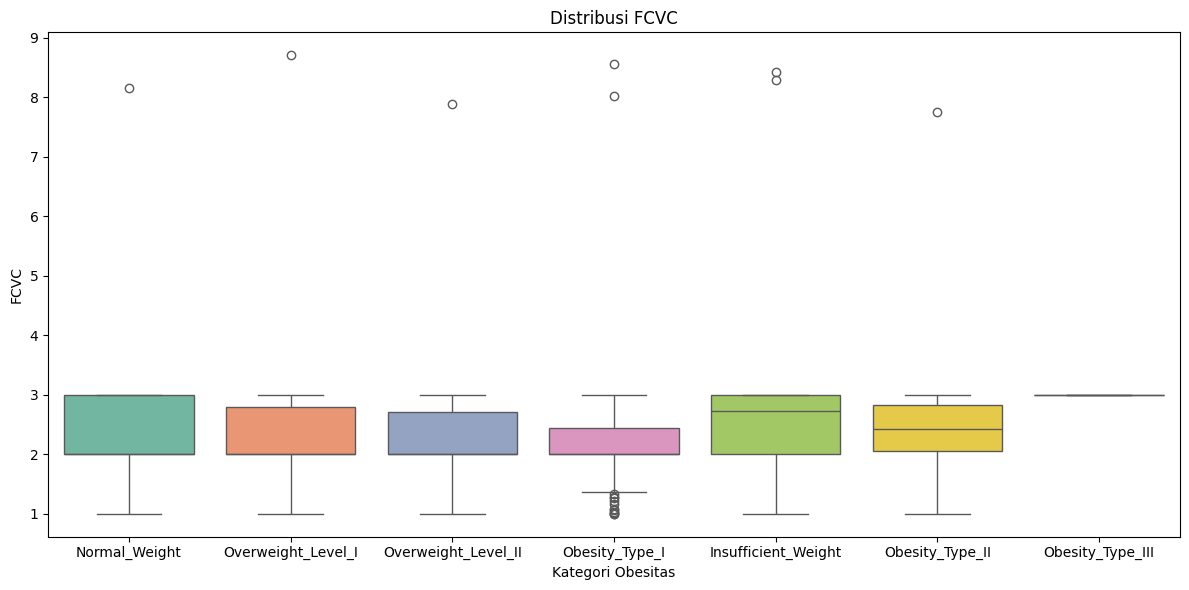

<ipython-input-16-bcd5a24d3843>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=col, data=df_cleaned, palette='Set2')


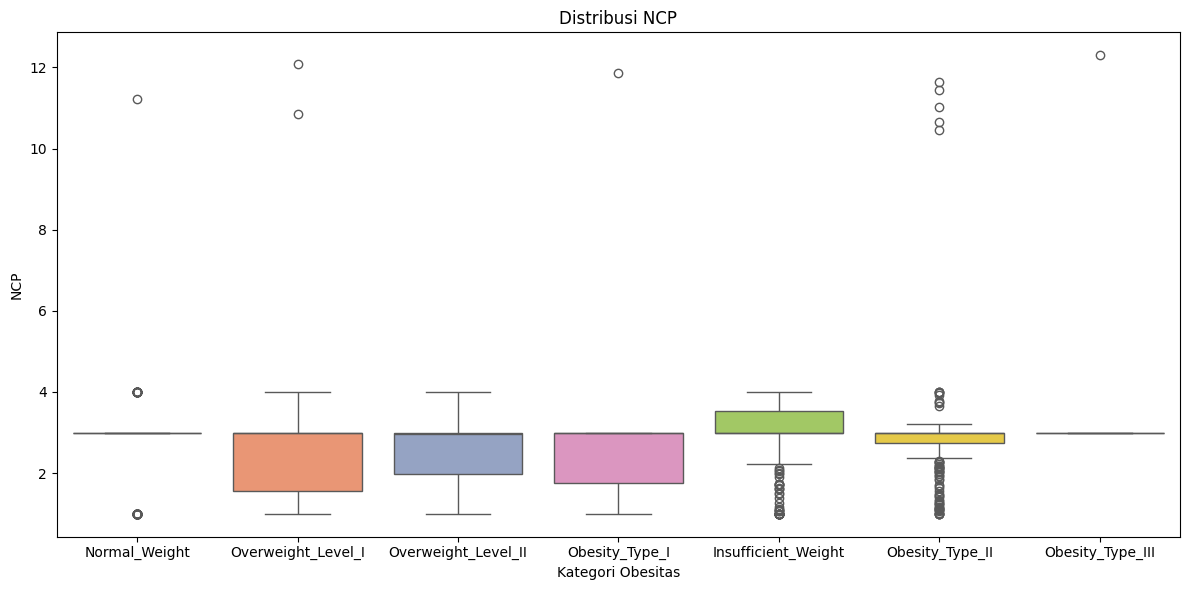

<ipython-input-16-bcd5a24d3843>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=col, data=df_cleaned, palette='Set2')


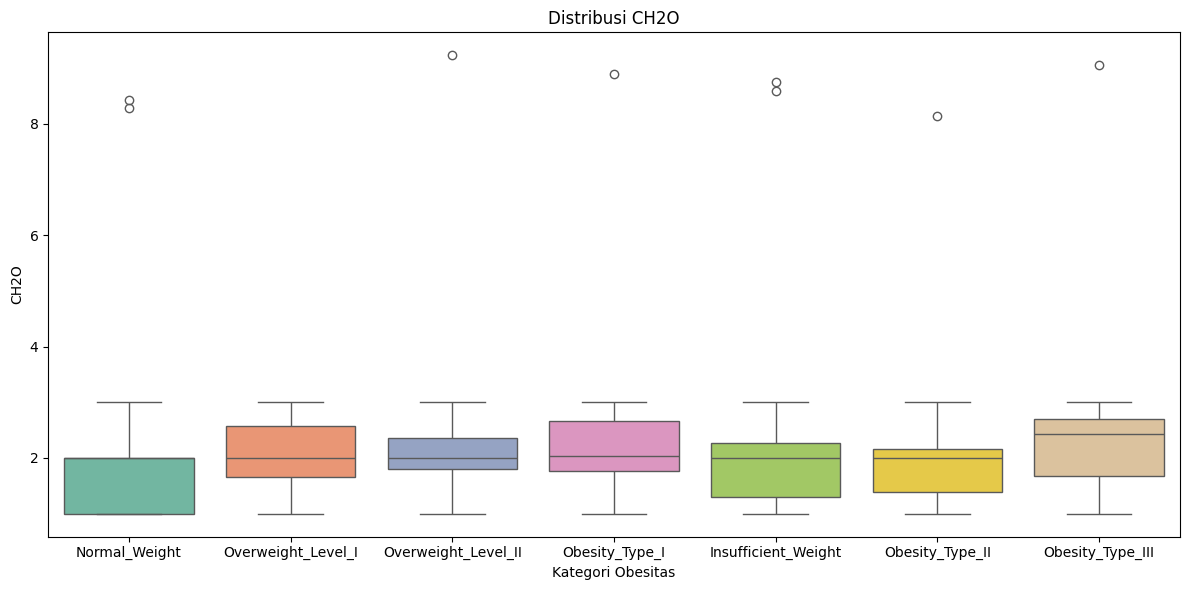

<ipython-input-16-bcd5a24d3843>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=col, data=df_cleaned, palette='Set2')


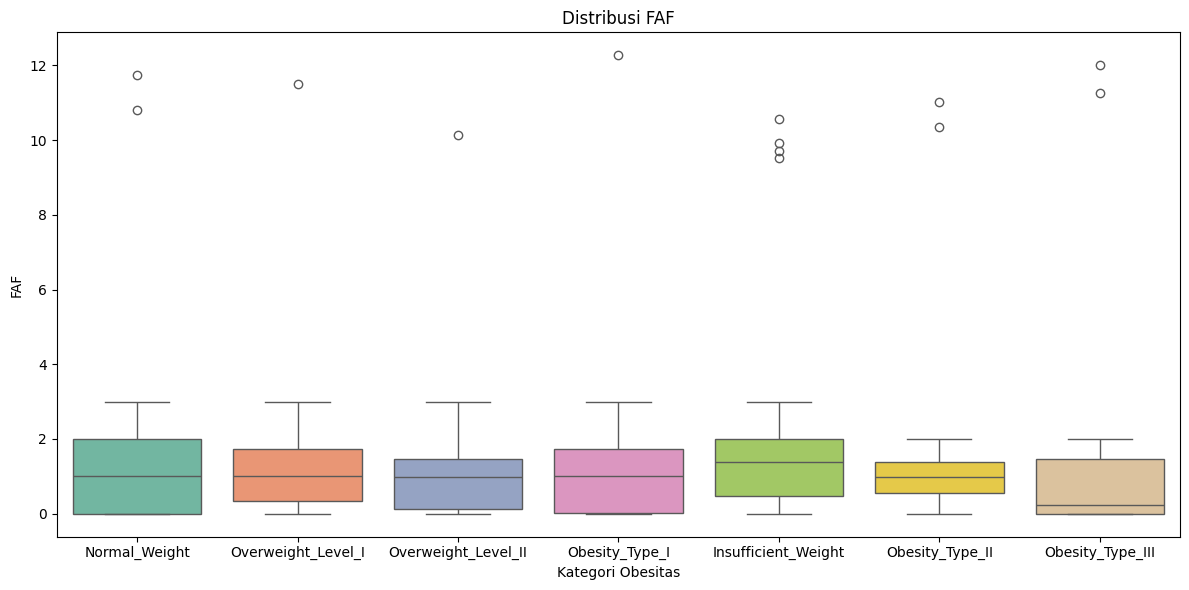

<ipython-input-16-bcd5a24d3843>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=col, data=df_cleaned, palette='Set2')


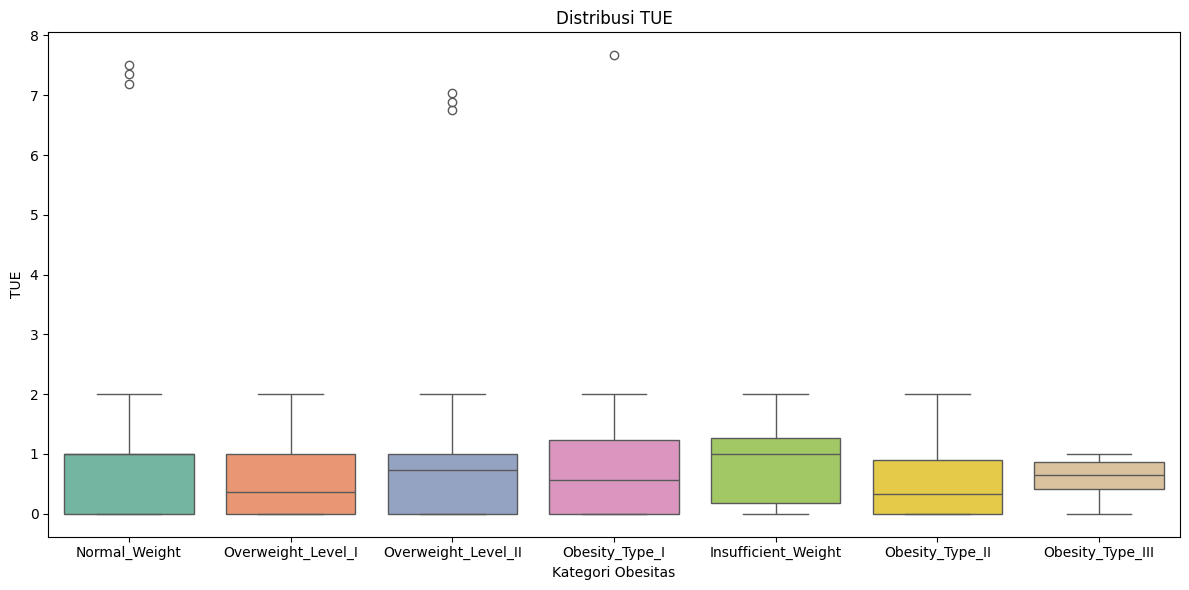

Visualisasi boxplot telah ditampilkan.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "ObesityDataSet.csv"
df = pd.read_csv(file_path)

# Kolom-kolom numerik yang perlu dikonversi
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Loop melalui kolom numerik dan coba konversi ke numeric, errors='coerce' akan mengubah nilai yang tidak valid menjadi NaN
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Setelah konversi, Anda mungkin memiliki missing values (NaN) yang perlu ditangani
# Anda bisa memilih untuk menghapusnya atau melakukan imputasi
df_cleaned = df.dropna(subset=numerical_columns + ['NObeyesdad']) # Hapus baris dengan NaN di kolom numerik atau target

# Sekarang Anda dapat membuat boxplot dengan data yang sudah dikonversi
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='NObeyesdad', y=col, data=df_cleaned, palette='Set2')
    plt.title(f'Distribusi {col}')
    plt.xlabel('Kategori Obesitas')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

print("Visualisasi boxplot telah ditampilkan.")

Tipe Data dan Missing Values: Dataset memiliki 17 kolom dan 2111 entri. Semua kolom terdeteksi sebagai tipe data 'object', yang mengindikasikan bahwa semua kolom, termasuk yang seharusnya numerik (seperti Age, Height, dan Weight) Distribusi Data Numerik terhadap Kategori Obesitas:

Age: Distribusi umur bervariasi antar kategori obesitas, dengan beberapa kategori menunjukkan rentang umur yang lebih luas dan beberapa outlier. Height: Tinggi badan juga menunjukkan variasi antar kategori, dengan beberapa outlier yang cukup tinggi. Weight: Berat badan menunjukkan perbedaan yang signifikan antar kategori obesitas, di mana kategori obesitas yang lebih tinggi memiliki berat badan yang jauh lebih tinggi. FCVC, NCP, CH2O, FAF, TUE: Fitur-fitur lain seperti FCVC (konsumsi sayuran), NCP (jumlah makanan utama), CH2O (konsumsi air), FAF (aktivitas fisik), dan TUE (waktu penggunaan perangkat teknologi) juga menunjukkan distribusi yang berbeda antar kategori obesitas, dengan beberapa outlier yang ekstrem.

### **2. Preprocessing Data**

**2.1 Tangani Missing Values, Duplikasi, dan Outlier**

In [18]:
print(df.isnull().sum())
df.dropna(inplace=True)  # Hapus baris dengan NaN jika jumlahnya sedikit
df.drop_duplicates(inplace=True)

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [20]:
# Menangani outlier (menggunakan IQR untuk fitur numerik)
# Fitur numerik yang akan diperiksa outlier-nya
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Fungsi untuk menghapus outlier menggunakan IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(f"Setelah menghapus outlier: {df.shape}")


Setelah menghapus outlier: (1169, 17)


In [21]:
from sklearn.preprocessing import LabelEncoder

# Encoding fitur kategorikal
# Label encoding untuk target
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])

# One-hot encoding untuk fitur kategorikal
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC',
                    'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
df = pd.get_dummies(df, columns=categorical_cols)

df.head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_?,Gender_Female,Gender_Male,family_history_with_overweight_?,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_?,FAVC_no,FAVC_yes,CAEC_?,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_?,SMOKE_no,SMOKE_yes,SCC_?,SCC_no,SCC_yes,CALC_?,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_?,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,5,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True
5,29.0,1.62,53.0,2.0,3.0,2.0,0.0,0.0,1,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False


In [22]:
# Pisahkan fitur dan target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [23]:
from imblearn.over_sampling import SMOTE

# Menangani ketidakseimbangan data dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Sebelum SMOTE:", y.value_counts())
print("Setelah SMOTE:", pd.Series(y_resampled).value_counts())

Sebelum SMOTE: NObeyesdad
4    274
3    180
2    175
1    171
6    130
5    126
0    113
Name: count, dtype: int64
Setelah SMOTE: NObeyesdad
1    274
5    274
2    274
6    274
3    274
0    274
4    274
Name: count, dtype: int64


In [26]:
# Normalisasi data (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Normalisasi tetap dilakukan di akhir preprocessing agar fitur numerik berada dalam rentang yang seragam, sehingga hasil model lebih stabil, adil, dan akurat — khususnya untuk algoritma yang sensitif terhadap skala.


Pada tahap *preprocessing*, beberapa langkah penting dilakukan untuk mempersiapkan data sebelum digunakan dalam proses pelatihan model. Pertama, data yang memiliki nilai kosong (*missing values*) dan data yang sama persis (*duplikat*) dibersihkan agar tidak mempengaruhi hasil analisis dan akurasi model. Kemudian, nilai-nilai yang terlalu jauh dari rata-rata (*outlier*) dihilangkan menggunakan metode IQR supaya distribusi data lebih stabil dan tidak mengganggu proses pembelajaran model.

Untuk data kategori seperti jenis kelamin atau kebiasaan makan, dilakukan proses konversi ke bentuk angka menggunakan label encoding untuk target dan one-hot encoding untuk fitur lainnya. Karena jumlah data di masing-masing kelas target tidak seimbang, digunakan teknik SMOTE untuk menambah data pada kelas yang jumlahnya sedikit, sehingga model bisa belajar dengan lebih adil. Terakhir, data yang sudah bersih dan seimbang dinormalisasi dengan *StandardScaler* supaya semua fitur numerik berada dalam skala yang sama. Dengan semua tahapan ini, data sudah siap digunakan untuk pemodelan klasifikasi pada tahap berikutnya.


## 3. **Pemodelan**

**Split Data**

In [27]:
from sklearn.model_selection import train_test_split

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


Kesimpulan: Data dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian dengan stratifikasi untuk menjaga proporsi kelas.

**Inisialisasi & Pelatihan Model**

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Pelatihan model
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Kesimpulan: Tiga model klasifikasi telah dilatih: Decision Tree, Logistic Regression, dan Random Forest.



**Evaluasi Model**

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

models = {
    "Decision Tree": dt_model,
    "Logistic Regression": lr_model,
    "Random Forest": rf_model
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    print(f"\nModel: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))



Model: Decision Tree
Confusion Matrix:
 [[52  2  0  0  0  0  0]
 [ 3 50  0  0  0  0  2]
 [ 0  0 53  0  0  0  2]
 [ 0  0  0 54  1  0  0]
 [ 0  0  0  0 55  0  0]
 [ 0  7  0  0  0 42  6]
 [ 0  0  4  0  0  3 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.85      0.91      0.88        55
           2       0.93      0.96      0.95        55
           3       1.00      0.98      0.99        55
           4       0.98      1.00      0.99        55
           5       0.93      0.76      0.84        55
           6       0.83      0.87      0.85        55

    accuracy                           0.92       384
   macro avg       0.92      0.92      0.92       384
weighted avg       0.92      0.92      0.92       384


Model: Logistic Regression
Confusion Matrix:
 [[52  2  0  0  0  0  0]
 [ 8 42  0  0  0  5  0]
 [ 0  0 51  0  0  0  4]
 [ 0  0  0 53  2  0  0]
 [ 0  0  0  0 55  0  0]
 [

Kesimpulan: Evaluasi menunjukkan metrik performa seperti akurasi, presisi, recall, dan F1-score. Random Forest biasanya unggul pada semua metrik.

**Visualisasi Performa Model**

<Figure size 1000x600 with 0 Axes>

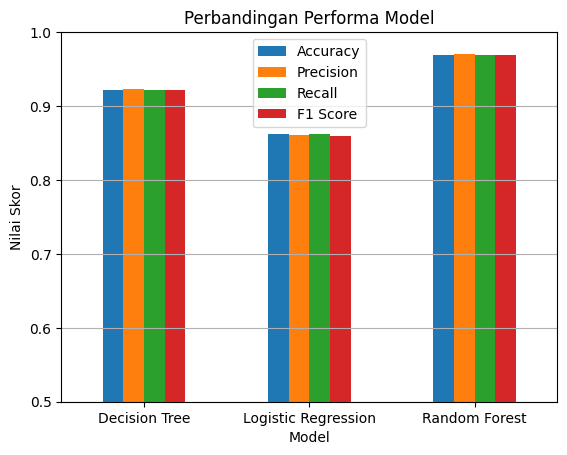

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualisasi performa
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
results_df.set_index("Model").plot(kind="bar", ylim=(0.5, 1.0), rot=0)
plt.title("Perbandingan Performa Model")
plt.ylabel("Nilai Skor")
plt.grid(axis='y')
plt.show()

Kesimpulan: Visualisasi menunjukkan bahwa Random Forest memiliki performa paling stabil dan tinggi dibandingkan dua model lainnya.



Kesimpulan Akhir pada Tahap Pemodelan :

Pada tahap pemodelan dan evaluasi, algoritma **Random Forest** memberikan hasil yang paling memuaskan dibanding dua model lainnya. Model ini berhasil mencapai skor tinggi dalam akurasi, presisi, recall, dan F1-score, sehingga sangat cocok dijadikan acuan utama (*baseline*) untuk tahap selanjutnya. Sementara itu, **Decision Tree** juga menunjukkan performa yang cukup baik, namun memiliki risiko *overfitting* karena terlalu menyesuaikan diri dengan data pelatihan. Di sisi lain, **Logistic Regression** memberikan hasil yang cukup stabil, tetapi kurang optimal karena tidak dapat menangani hubungan antar fitur yang bersifat non-linear. Dengan hasil ini, seluruh model yang diuji sudah siap untuk masuk ke tahap **penyempurnaan parameter (Hyperparameter Tuning)** guna meningkatkan kinerja secara keseluruhan.
**bold text**